## Table of Contents

[**Problem Statement**](#Problem Statement)

[**Loading File Instruction**](#Download File)

[**Pre - Processing Data**](#Pre - Processing)

[**Obtaining all possible user journeys**](#unique)

[**Obtaining Final Matrix that captures data of every customer**](#Final matrix)

[**K - Means for clustering users into segments**](#K Means)

[**Analyzing the clusters obtained**](#analyzing)

[**Cluster 1 Analysis**](#cluster 1)

[**Representative customer journey for cluster 1**](#represent)

<a name="Problem Statement">
### Problem Statement
</a>

#### Traditional methods involve finding pairwise score leading to N square order of complexity. Using this approach, we can eliminate the process of finding pairwise score resulting in an order of complexity N. This approach makes it possible to cluster large number of customers into different segments based on their user journey in a relatively short time period

In [1]:
# import packages
import numpy as np
import pandas as pd
import itertools
import time
import operator
import os


In [2]:
from sklearn.cluster import KMeans
import sklearn
import pylab as pl
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
os.chdir(os.getcwd())

<a name="Download File">

## Please download the Jupyter Notebook file and data in the same folder
</a>

In [4]:
events=pd.read_csv('castlight_events_full.csv')

In [5]:
events.head(3)

,Unnamed: 0,newid,event_code_new
0,0,470.736995,.wssssps.wsSpppwppcfssssss.sws.psSsssssssspS.p.
1,1,497.857109,ssS.sSppbb.ssspsSssbllSS.
2,4,1372.080296,bnnnbbSn.c.bSSSfe


In [6]:
events.newid.nunique()

9998

<a name = "Pre - Processing">
## Pre - Processing Data and Obtaining Customer Matrices
</a>

#### Customer Matrix captures customer's path in the order they occur. These matrices are obtained for every Customer

In [7]:
b= events['event_code_new']
til = []
for i in range(len(events.newid)):
#for i in range(100):
    t = str(b[i])
    til.append(t)
print(len(til))

10001


In [8]:
# to remove consecutive repeating characters 
tila=[]
for i in range(len(til)):
    b=''.join(i for i, _ in itertools.groupby(til[i]))
    tila.append(b)
print(len(tila))
print(tila)


10001
['.wsps.wsSpwpcfs.sws.psSspS.p.', 'sS.sSpb.spsSsblS.', 'bnbSn.c.bSfe', 'b.bcncbib.nt.b.l.i.n.bf.p.s.spc.b.t.tvb.t', '.f.fsbl', '.sp.pfsbsp.sp.', 'n.cn.psn.n', 'bfbib.', 'f.sp.sp.s.s.b.ib.nb.p.', '.cbsf.f.i.nb.pf.n.s.bpspbpsbSsSsSsSsSsS.', '.psSpsSp.Slp', '.fpspsp.sfp.bpspspb.', 'sps.f.f.bs.b.', 'fpbfi.b.', 'spspspspswpsws.psps', '.s.p.fcfcf.csp.sfSbSpn.bfpfp.bn.f.sc', 'lspelplbls.b.b.', '.pc.fses.p.bsp', 'bsplSlbspepepswp.bSsSfspSfsfpfpSpspspspS', 'sSbpsb.spswspep.p.psSsSpspc.fbsp.l.f.sSp.SsSbspsb.bf.bfcfp', '.bplplspb.ps', '.bswspbSlbSl', 'c.b.blb.Sl.b.', '.f.f.lbesSpsSsf.b.f.fb.b.bf.f.b.bfps.nf.bn.b.', '.pbSsSsSsS.pbsSpsSp.SpsS', 'bf.St.t.tb.b.b.tcbt.b.blbf.tnb.btbScsbf.bf.b.b.b.ibf.scfnfs.sf.fbtnSfpb.b.b.tvi.b.nf.tb.t.i.cb.b.b.b.b.', '.lblsb', '.lwswspsp', '.nf.sp.f.pb.c.csbcnb', 'Sp.lsSspSsbsSs.SpScsc.S.p.pcS.cS.ScSsS.p.sSpS.S.sScsSsSpwsSsS.spwsSlsSsSsSsSsSsSsSpSsSspsS.SlspsSspbsSpseseSeSsSpSsp.s.Sp.ws.spsSpSsSsl.sw.spsp.wsSsSpSspsb.p.sSsS.cSspwswsSplS.p.b.', '.b.pw.spsp.p', 

In [9]:

n_tila=[s.replace('.', '.') for s in tila]
print(n_tila[:5])
#info = (data[:75] + '..') if len(data) > 75 else data

        
    
    
    

['.wsps.wsSpwpcfs.sws.psSspS.p.', 'sS.sSpb.spsSsblS.', 'bnbSn.c.bSfe', 'b.bcncbib.nt.b.l.i.n.bf.p.s.spc.b.t.tvb.t', '.f.fsbl']


In [10]:
# to restrict the length of each customer event
red_tila=[] 
for i in range(len(n_tila)):
    if len(n_tila[i])>30:
        red_tila.append(n_tila[i][0:30])
    else:
        red_tila.append(n_tila[i])

In [11]:
print(len(red_tila))
print(red_tila)


10001
['.wsps.wsSpwpcfs.sws.psSspS.p.', 'sS.sSpb.spsSsblS.', 'bnbSn.c.bSfe', 'b.bcncbib.nt.b.l.i.n.bf.p.s.sp', '.f.fsbl', '.sp.pfsbsp.sp.', 'n.cn.psn.n', 'bfbib.', 'f.sp.sp.s.s.b.ib.nb.p.', '.cbsf.f.i.nb.pf.n.s.bpspbpsbSs', '.psSpsSp.Slp', '.fpspsp.sfp.bpspspb.', 'sps.f.f.bs.b.', 'fpbfi.b.', 'spspspspswpsws.psps', '.s.p.fcfcf.csp.sfSbSpn.bfpfp.b', 'lspelplbls.b.b.', '.pc.fses.p.bsp', 'bsplSlbspepepswp.bSsSfspSfsfpf', 'sSbpsb.spswspep.p.psSsSpspc.fb', '.bplplspb.ps', '.bswspbSlbSl', 'c.b.blb.Sl.b.', '.f.f.lbesSpsSsf.b.f.fb.b.bf.f.', '.pbSsSsSsS.pbsSpsSp.SpsS', 'bf.St.t.tb.b.b.tcbt.b.blbf.tnb', '.lblsb', '.lwswspsp', '.nf.sp.f.pb.c.csbcnb', 'Sp.lsSspSsbsSs.SpScsc.S.p.pcS.', '.b.pw.spsp.p', 'sp.pSsSsSfesesS.f', 'p.swspsw', 'spsplblb', '.fSpspfp', '.cbl.l.b.s', 'b.spsSspsSpbs', 'b', '.s.s.psps.sp.p.p', '.fspfwesb', '.b.b.b.fb.', 'Spbc.cS.b.sp.p.spsS.pSbSl.b.lS', '.p.spsps.p.', 'c.wswspb.f.f.f.f.n.b.f.sps.pf.', 'sSsSp.pS.sS', 'nbnsfsb.n', 'b.btf.btb.b.t.tbp', '.c.sp.f.fsp.Ssf.pfsf.p.pspspsp

In [12]:
sum(len(i) for i in red_tila) # to verify the number of 1's obtained i.e no. of steps taken by customers by excluding consecutive same steps

166184

<a name = "unique">
### Obtaining all possible user journeys
</a>

In [13]:
events=["t","w","f","l","i","v","e","p","A","S","s","b","n","C","c","P","F","E","R","."]

In [14]:
# To create all possible combinations a customer can take 
from itertools import permutations 
bigrams=permutations(events,2)
l_bigrams=list(bigrams)
bigrams_list=[]
for i in l_bigrams:
    bigram="".join(i)
    bigrams_list.append(bigram)
#new_str=["tt","ww","ff","ll","ii","vv","ee","pp","AA","SS","ss","bb","nn","CC","cc","PP","FF","EE","RR"] #not created in permutation
#bigrams_list=bigram_list+new_str
print(bigrams_list)
print(len(bigrams_list))
    
    


['tw', 'tf', 'tl', 'ti', 'tv', 'te', 'tp', 'tA', 'tS', 'ts', 'tb', 'tn', 'tC', 'tc', 'tP', 'tF', 'tE', 'tR', 't.', 'wt', 'wf', 'wl', 'wi', 'wv', 'we', 'wp', 'wA', 'wS', 'ws', 'wb', 'wn', 'wC', 'wc', 'wP', 'wF', 'wE', 'wR', 'w.', 'ft', 'fw', 'fl', 'fi', 'fv', 'fe', 'fp', 'fA', 'fS', 'fs', 'fb', 'fn', 'fC', 'fc', 'fP', 'fF', 'fE', 'fR', 'f.', 'lt', 'lw', 'lf', 'li', 'lv', 'le', 'lp', 'lA', 'lS', 'ls', 'lb', 'ln', 'lC', 'lc', 'lP', 'lF', 'lE', 'lR', 'l.', 'it', 'iw', 'if', 'il', 'iv', 'ie', 'ip', 'iA', 'iS', 'is', 'ib', 'in', 'iC', 'ic', 'iP', 'iF', 'iE', 'iR', 'i.', 'vt', 'vw', 'vf', 'vl', 'vi', 've', 'vp', 'vA', 'vS', 'vs', 'vb', 'vn', 'vC', 'vc', 'vP', 'vF', 'vE', 'vR', 'v.', 'et', 'ew', 'ef', 'el', 'ei', 'ev', 'ep', 'eA', 'eS', 'es', 'eb', 'en', 'eC', 'ec', 'eP', 'eF', 'eE', 'eR', 'e.', 'pt', 'pw', 'pf', 'pl', 'pi', 'pv', 'pe', 'pA', 'pS', 'ps', 'pb', 'pn', 'pC', 'pc', 'pP', 'pF', 'pE', 'pR', 'p.', 'At', 'Aw', 'Af', 'Al', 'Ai', 'Av', 'Ae', 'Ap', 'AS', 'As', 'Ab', 'An', 'AC', 'Ac', 'AP

<a name="Final matrix">
### Obtaining Final Matrix that captures data of all customers
</a>

#### Each Row in final matrix represents a customer Journey. This matrix captures the data of all customers in the order they occur 

In [15]:
#for the matrix creation
start = time.time()
i_cust=[]
i_journey=[]
for i in range(len(red_tila)): #red_tila=customer journeys
    length=len(red_tila[i]) #length of each customer journey
    for j in range(length): #diving into each customer
        #print(n_tila[i][j:j+2])
        for n in bigrams_list:
            if n==n_tila[i][j:j+2]:
                i_cust.append(1)
                #i_journey.append(n)
            else:
                i_cust.append(0)
        i_journey.append(i_cust)
        i_cust=[]
end = time.time()
print("processing time",end - start)
        

processing time 29.507453441619873


In [16]:
#i_journey can be visualized as a matrix containing each step of all customers
print(len(i_journey))
print(i_journey[0])# each list of a list represents individual step




166184
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
start = time.time()
combined_i_journey=[]
combined_journey=[]
for i in range(len(red_tila)):
    for j in range(len(red_tila[i])):
        combined_journey.append(i_journey[j])
    combined_i_journey.append(combined_journey)
    combined_journey=[]

end = time.time()
print("processing time",end - start)

processing time 0.07118773460388184


In [18]:
print(len(combined_i_journey))
print(combined_i_journey[0])


10001
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
#almost final is a list containing n list elements; each element representing individual customer 
almost_final=[]
for i in range(len(combined_i_journey)):
    flat=itertools.chain.from_iterable(combined_i_journey[i])
    almost_final.append(list(flat))

    

In [20]:
#print(almost_final) 
print(almost_final[7].count(1))
print(len(almost_final))
#print(almost_final)



6
10001


In [21]:
# Converting list to dataframe
my_df = pd.DataFrame(almost_final)
#my_df #NaN because some of the customer journeys are lesser than 30 in length

In [22]:
# Convert DataFrame to matrix
mat =my_df.values
mat

array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [23]:
#matr is final matrix
matr=np.nan_to_num(mat,copy=False) 
print(matr)
print("number of 1's:",np.count_nonzero(matr == 1)) #to verify the number of steps taken by the customers
print("matrix dimension",matr.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of 1's: 164468
matrix dimension (10001, 11400)


<a name="K Means">
### K - Means for clustering users into segments
</a>

#### Final Matrix is provided as a input to K Means clustering to obtain 4 segments based on their click path

In [24]:
start = time.time()
km = sklearn.cluster.KMeans(n_clusters=4)
km.fit(matr)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([my_df.index,labels]).T
results.columns = ['Customer', 'Cluster']
print(results)

end = time.time()
print("processing time",end - start)

       Customer  Cluster
0             0        0
1             1        2
2             2        2
3             3        0
4             4        1
5             5        2
6             6        1
7             7        1
8             8        3
9             9        0
10           10        2
11           11        3
12           12        2
13           13        1
14           14        3
15           15        0
16           16        2
17           17        2
18           18        0
19           19        0
20           20        2
21           21        2
22           22        2
23           23        0
24           24        3
25           25        0
26           26        1
27           27        1
28           28        3
29           29        0
...         ...      ...
9971       9971        1
9972       9972        0
9973       9973        0
9974       9974        3
9975       9975        2
9976       9976        2
9977       9977        1
9978       9978        1


C:\Users\Rohit Kata\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F54C0C8D0>]],
      dtype=object)

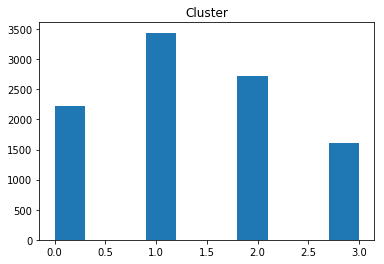

In [25]:
results.hist(column='Cluster',grid= "FALSE")

<a name="analyzing">
## Analyzing the clusters obtained
</a>

#### We will obtain representative journey for the clusters obtained

In [26]:
#obtaining customers belonging to each cluster
customer_0=[]
customer_1=[]
customer_2=[]
customer_3=[]
for i in range(len(results["Cluster"])):
    if results["Cluster"][i]==0:
        customer_0.append(results["Customer"][i])
    elif results["Cluster"][i]==1:
        customer_1.append(results["Customer"][i])
    elif results["Cluster"][i]==2:
        customer_2.append(results["Customer"][i])
    elif results["Cluster"][i]==3:
        customer_3.append(results["Customer"][i])

In [27]:
# obtaining event sequence for customers in each cluster
customer_string_0=[]
customer_string_1=[]
customer_string_2=[]
customer_string_3=[]
for i in customer_0:
    customer_string_0.append(red_tila[i])
for i in customer_1:
    customer_string_1.append(red_tila[i])
for i in customer_2:
    customer_string_2.append(red_tila[i])
for i in customer_3:
    customer_string_3.append(red_tila[i])
 

In [28]:
print(len(customer_string_0)+len(customer_string_1)+len(customer_string_2)+len(customer_string_3))

10001


<a name="cluster 1">
### Cluster 1 Analysis
</a>

In [29]:
step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10,step_11,step_12,step_13,step_14,step_15,step_16,step_17,step_18,step_19,step_120,step_121,step_122,step_123,step_124,step_125,step_126,step_127,step_128,step_129,step_130=([] for i in range(30))

In [30]:
for i in range(len(customer_string_0)):
    step_1.append(customer_string_0[i][:2])
    step_2.append(customer_string_0[i][1:3])
    step_3.append(customer_string_0[i][2:4])
    step_4.append(customer_string_0[i][3:5])
    step_5.append(customer_string_0[i][4:6])
    step_6.append(customer_string_0[i][5:7])
    step_7.append(customer_string_0[i][6:8])
    step_8.append(customer_string_0[i][7:9])
    step_9.append(customer_string_0[i][8:10])
    step_10.append(customer_string_0[i][9:11])
    step_11.append(customer_string_0[i][10:12])
    step_12.append(customer_string_0[i][11:13])
    step_13.append(customer_string_0[i][12:14])
    step_14.append(customer_string_0[i][13:15])
    step_15.append(customer_string_0[i][14:16])
    step_16.append(customer_string_0[i][15:17])
    step_17.append(customer_string_0[i][16:18])
    step_18.append(customer_string_0[i][17:19])
    step_19.append(customer_string_0[i][18:20])
    step_120.append(customer_string_0[i][19:21])
    step_121.append(customer_string_0[i][20:22])
    step_122.append(customer_string_0[i][21:23])
    step_123.append(customer_string_0[i][22:24])
    step_124.append(customer_string_0[i][23:25])
    step_125.append(customer_string_0[i][24:26])
    step_126.append(customer_string_0[i][25:27])
    step_127.append(customer_string_0[i][26:28])
    step_128.append(customer_string_0[i][27:29])
    step_129.append(customer_string_0[i][28:30])

    

    

In [31]:
# listx is the frequency of bigrams in step 1,step 2 etc.This is to determine the most common paths taken by customers in each step 
# we have restricted the number of steps for each customer to 30
list1=Counter(step_1)
list2=Counter(step_2)
list3=Counter(step_3)
list4=Counter(step_4)
list5=Counter(step_5)
list6=Counter(step_6)
list7=Counter(step_7)
list8=Counter(step_8)
list9=Counter(step_9)
list10=Counter(step_10)
list11=Counter(step_11)
list12=Counter(step_12)
list13=Counter(step_13)
list14=Counter(step_14)
list15=Counter(step_15)
list16=Counter(step_16)
list17=Counter(step_17)
list18=Counter(step_18)
list19=Counter(step_19)
list120=Counter(step_120)
list121=Counter(step_121)
list122=Counter(step_122)
list123=Counter(step_123)
list124=Counter(step_124)
list125=Counter(step_125)
list126=Counter(step_126)
list127=Counter(step_127)
list128=Counter(step_128)
list129=Counter(step_129)
list130=Counter(step_130)

In [32]:

sorted_1 = sorted(list1.items(), key=operator.itemgetter(1))
sorted_2= sorted(list2.items(), key=operator.itemgetter(1))
sorted_3 = sorted(list3.items(), key=operator.itemgetter(1))
sorted_4 = sorted(list4.items(), key=operator.itemgetter(1))
sorted_5 = sorted(list5.items(), key=operator.itemgetter(1))
sorted_6 = sorted(list6.items(), key=operator.itemgetter(1))
sorted_7 = sorted(list7.items(), key=operator.itemgetter(1))
sorted_8 = sorted(list8.items(), key=operator.itemgetter(1))
sorted_9 = sorted(list9.items(), key=operator.itemgetter(1))
sorted_10 = sorted(list10.items(), key=operator.itemgetter(1))
sorted_11 = sorted(list11.items(), key=operator.itemgetter(1))
sorted_12 = sorted(list12.items(), key=operator.itemgetter(1))
sorted_13 = sorted(list13.items(), key=operator.itemgetter(1))
sorted_14 = sorted(list14.items(), key=operator.itemgetter(1))
sorted_15 = sorted(list15.items(), key=operator.itemgetter(1))
sorted_16 = sorted(list16.items(), key=operator.itemgetter(1))
sorted_17 = sorted(list17.items(), key=operator.itemgetter(1))
sorted_18 = sorted(list18.items(), key=operator.itemgetter(1))
sorted_19 = sorted(list19.items(), key=operator.itemgetter(1))
sorted_20 = sorted(list120.items(), key=operator.itemgetter(1))
sorted_21 = sorted(list121.items(), key=operator.itemgetter(1))
sorted_22 = sorted(list122.items(), key=operator.itemgetter(1))
sorted_23 = sorted(list123.items(), key=operator.itemgetter(1))
sorted_24 = sorted(list124.items(), key=operator.itemgetter(1))
sorted_25 = sorted(list125.items(), key=operator.itemgetter(1))
sorted_26 = sorted(list126.items(), key=operator.itemgetter(1))
sorted_27 = sorted(list127.items(), key=operator.itemgetter(1))
sorted_28 = sorted(list128.items(), key=operator.itemgetter(1))
sorted_29 = sorted(list129.items(), key=operator.itemgetter(1))
sorted_30 = sorted(list130.items(), key=operator.itemgetter(1))

<a name = "represent">
### Representative customer journey for cluster 1
</a>

In [33]:

rep_journey=[sorted_1[len(sorted_1)-1],sorted_2[len(sorted_2)-1],sorted_3[len(sorted_3)-1],sorted_4[len(sorted_4)-1],sorted_6[len(sorted_6)-1],sorted_7[len(sorted_7)-1],sorted_8[len(sorted_8)-1],sorted_9[len(sorted_9)-1],sorted_10[len(sorted_10)-1],sorted_11[len(sorted_11)-1],sorted_12[len(sorted_12)-1],sorted_13[len(sorted_13)-1],sorted_14[len(sorted_14)-1],sorted_15[len(sorted_15)-1],sorted_16[len(sorted_16)-1],sorted_17[len(sorted_17)-1],sorted_18[len(sorted_18)-1],sorted_19[len(sorted_19)-1],sorted_20[len(sorted_20)-1]]
rep_journey

[('.b', 194),
 ('b.', 161),
 ('.b', 142),
 ('b.', 153),
 ('sS', 161),
 ('sS', 132),
 ('sS', 146),
 ('sp', 133),
 ('sS', 141),
 ('sp', 131),
 ('ps', 142),
 ('sp', 140),
 ('sp', 151),
 ('sp', 148),
 ('sp', 166),
 ('ps', 154),
 ('sp', 149),
 ('sp', 138),
 ('sp', 155)]